In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [2]:

df = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")
df.head()      
df.tail()      
df.info()      
df.describe()  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [3]:
print(df.columns)


Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


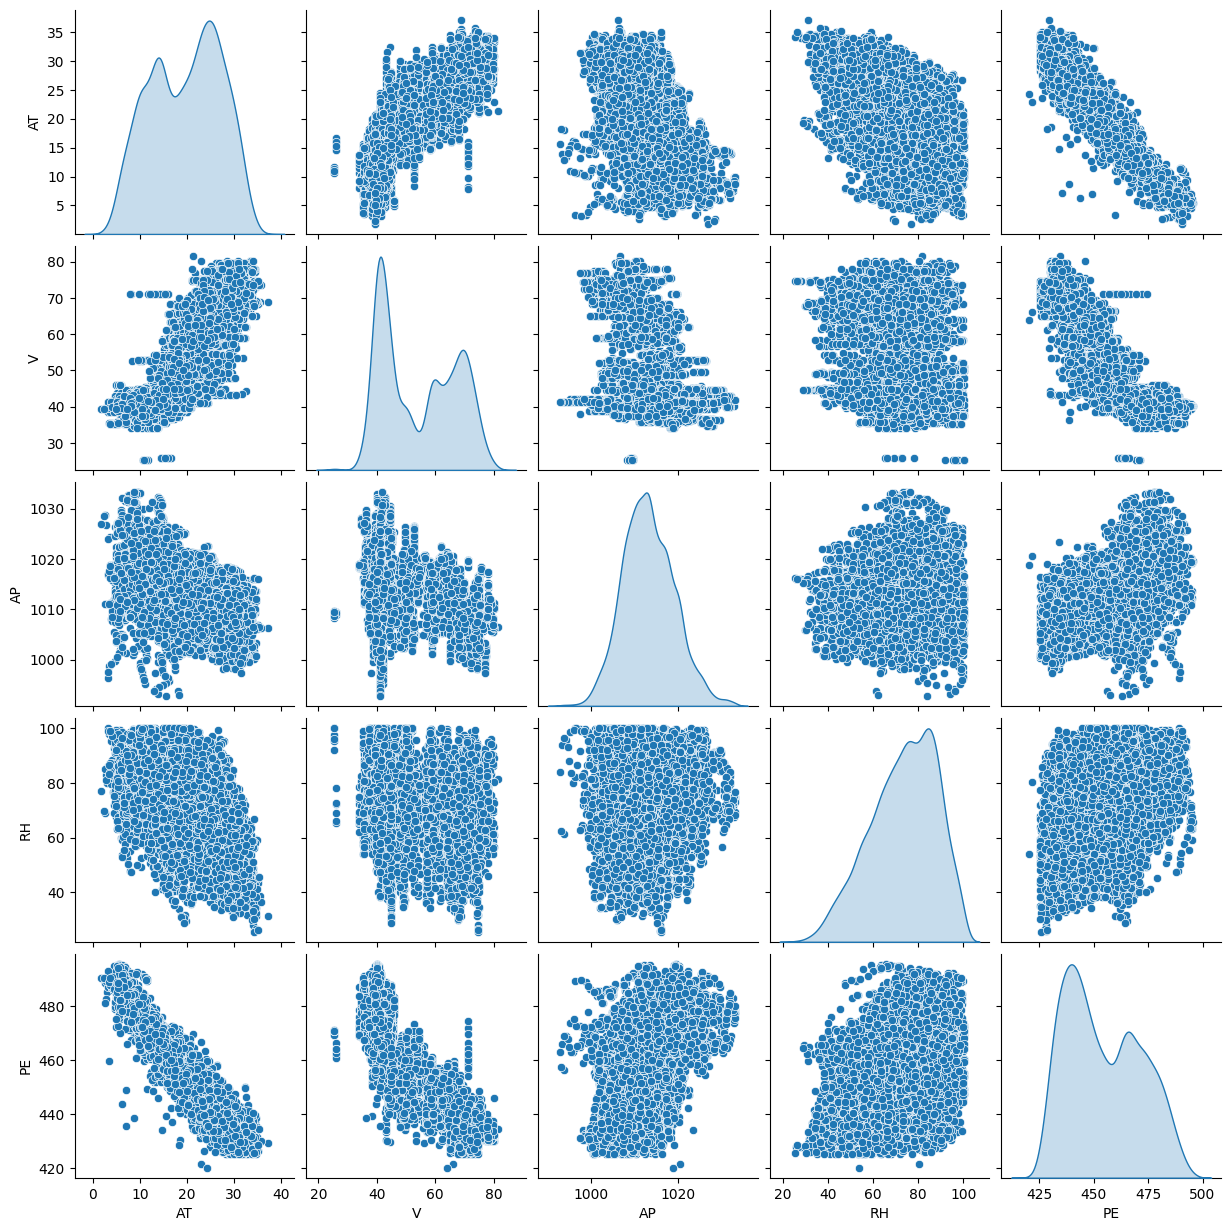

In [5]:


sns.pairplot(df, diag_kind='kde')  
plt.show()


In [6]:
# Basic stats
stats = df.describe()

# Range = max - min
range_values = df.max() - df.min()

# IQR = 75% - 25%
IQR_values = stats.loc['75%'] - stats.loc['25%']

# Combine into a summary DataFrame
summary_table = pd.DataFrame({
    'mean':   stats.loc['mean'],
    'median': stats.loc['50%'],
    'min':    stats.loc['min'],
    'max':    stats.loc['max'],
    'range':  range_values,
    'Q1':     stats.loc['25%'],
    'Q3':     stats.loc['75%'],
    'IQR':    IQR_values
})

summary_table

,mean,median,min,max,range,Q1,Q3,IQR
AT,19.651231,20.345,1.81,37.11,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,25.36,81.56,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,992.89,1033.30,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,25.56,100.16,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,420.26,495.76,75.50,439.7500,468.43,28.6800


In [8]:


predictors = ["AT", "V", "AP", "RH"]
results_simple = {}

for pred in predictors:
    X = sm.add_constant(df[pred])   # Add intercept
    y = df["PE"]
    model = sm.OLS(y, X).fit()
    results_simple[pred] = model
    print(f"Simple Regression with predictor: {pred}")
    print(model.summary())
    print("\n" + "-"*70 + "\n")


Simple Regression with predictor: AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:24:26   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        49

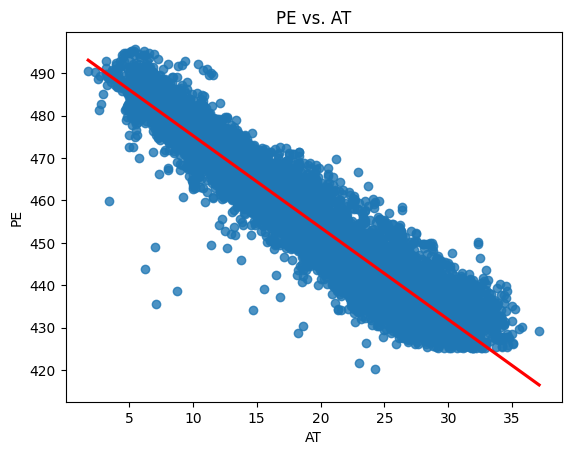

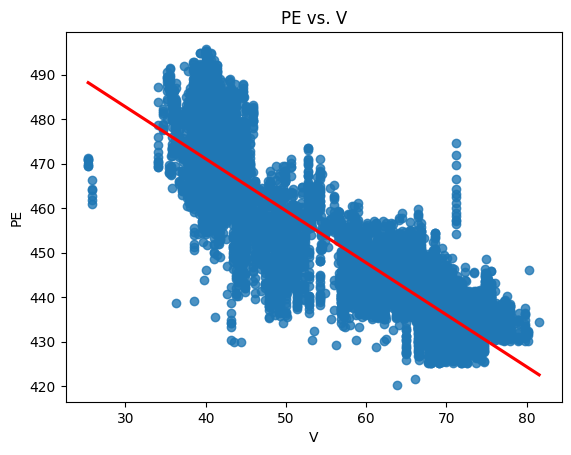

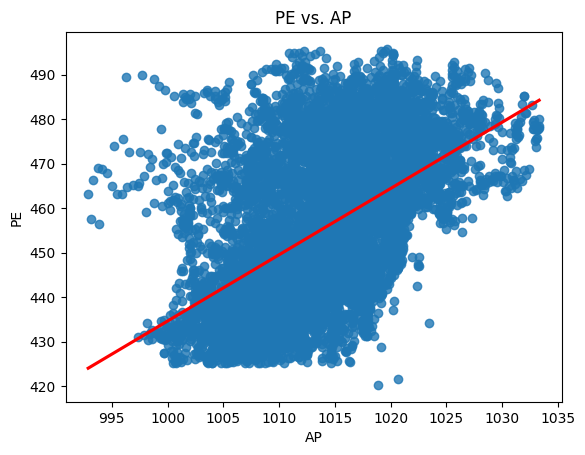

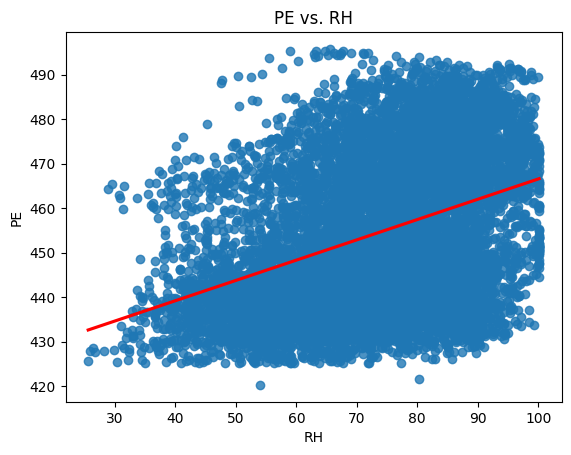

In [9]:

for pred in predictors:
    sns.regplot(x=pred, y='PE', data=df, ci=None, line_kws={"color":"red"})
    plt.title(f"PE vs. {pred}")
    plt.show()


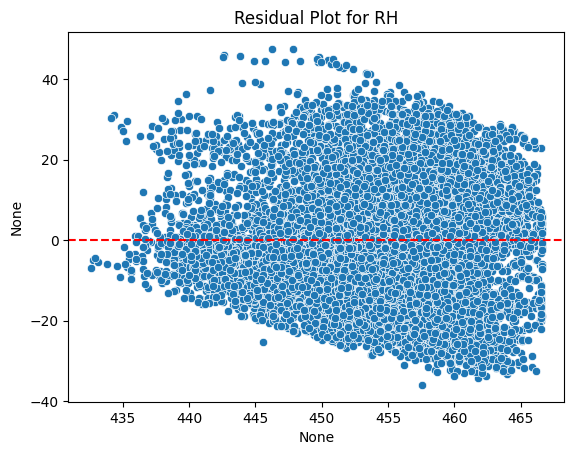

In [10]:
fitted_vals = model.fittedvalues
residuals = model.resid
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title(f'Residual Plot for {pred}')
plt.show()


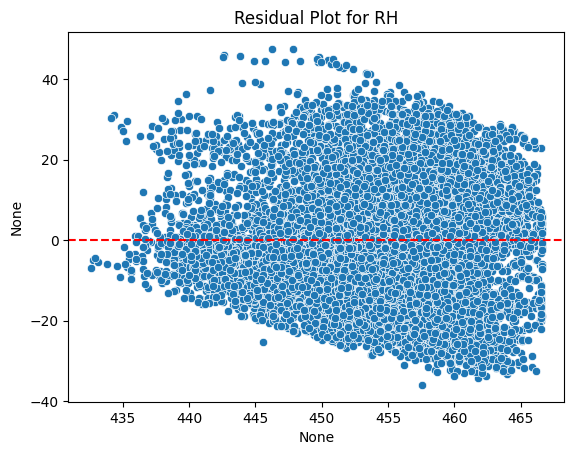

In [11]:
fitted_vals = model.fittedvalues
residuals = model.resid
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title(f'Residual Plot for {pred}')
plt.show()


In [12]:
X = df[["AT", "V", "AP", "RH"]]
X = sm.add_constant(X)
y = df["PE"]

model_multiple = sm.OLS(y, X).fit()
print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:24:39   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

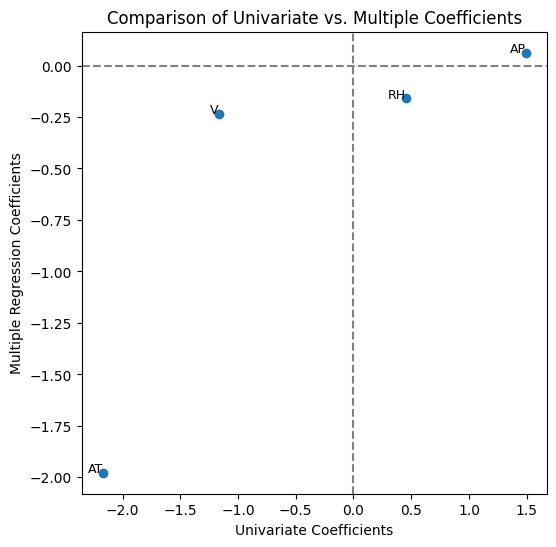

In [13]:
univariate_coefs = []
for pred in predictors:
    univariate_coefs.append(results_simple[pred].params[pred])

multivariate_coefs = []
for pred in predictors:
    multivariate_coefs.append(model_multiple.params[pred])

# Plot
plt.figure(figsize=(6,6))
plt.scatter(univariate_coefs, multivariate_coefs)

for i, pred in enumerate(predictors):
    plt.text(univariate_coefs[i], multivariate_coefs[i], pred,
             fontsize=9, ha='right')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Univariate Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Univariate vs. Multiple Coefficients")
plt.show()


In [14]:
X_poly = pd.DataFrame()
X_poly['AT'] = df['AT']
X_poly['AT^2'] = df['AT']**2
X_poly['AT^3'] = df['AT']**3
X_poly = sm.add_constant(X_poly)

y = df['PE']
model_poly_at = sm.OLS(y, X_poly).fit()
print(model_poly_at.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:24:44   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [20]:
X_poly = pd.DataFrame()
X_poly['AT'] = df['AT']
X_poly['AT^2'] = df['AT']**2
X_poly['AT^3'] = df['AT']**3
X_poly = sm.add_constant(X_poly)

y = df['PE']
model_poly_at = sm.OLS(y, X_poly).fit()
print(model_poly_at.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:28:20   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [22]:


train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)


In [27]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)


In [28]:
X_train = train_df.drop(columns=["PE"])
y_train = train_df["PE"]
X_test = test_df.drop(columns=["PE"])
y_test = test_df["PE"]


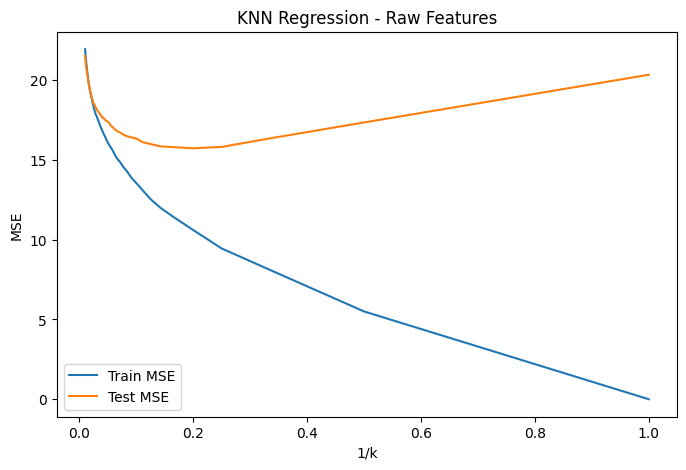

Best k (raw features): 5
Corresponding Test MSE: 15.726819842563568


In [29]:
train_errors = []
test_errors = []
k_values = range(1, 101)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot train/test error vs. 1/k
plt.figure(figsize=(8,5))
plt.plot([1/k for k in k_values], train_errors, label='Train MSE')
plt.plot([1/k for k in k_values], test_errors, label='Test MSE')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression - Raw Features')
plt.legend()
plt.show()

best_k_raw = test_errors.index(min(test_errors)) + 1  # +1 because index starts at 0
print("Best k (raw features):", best_k_raw)
print("Corresponding Test MSE:", min(test_errors))


In [38]:
best_linear_test_mse = min(test_mse_all, test_mse_complex)  # or whichever is best

print("Best Linear Model Test MSE:", best_linear_test_mse)

print("Best KNN (Raw) Test MSE:", min(test_errors))


Best Linear Model Test MSE: 17.566558911700508
Best KNN (Raw) Test MSE: 15.726819842563568
